# Logistic Map Bifurcation Diagram

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interact, FloatSlider

In [36]:
def logistic_map(r, x):
    """
    Compute the next value in the logistic map sequence.

    Parameters:
    r (float): The rate parameter of the logistic map, which controls the behavior of the map.
    x (float): The current value in the logistic map sequence.

    Returns:
    float: The next value in the logistic map sequence.
    """
    return r * x * (1 - x)


def plot_bifurcation(start_r, end_r, num_r_values, num_iterations, last_iterations):
    """
    Plot the bifurcation diagram of the logistic map.

    Parameters:
    start_r (float): The starting value of the rate parameter r.
    end_r (float): The ending value of the rate parameter r.
    num_r_values (int): The number of values to sample between start_r and end_r.
    num_iterations (int): The total number of iterations per r value to compute.
    last_iterations (int): The number of iterations at the end of the sequence to plot, 
                           capturing the long-term behavior of the map.

    This function plots the bifurcation diagram, showing the different behaviors of the
    logistic map (e.g., steady state, periodic, chaotic) as the parameter r varies.
    """
    r_values = np.linspace(start_r, end_r, num_r_values)
    initial_x = 0.5
    x_values = np.ones(num_r_values) * initial_x

    plt.figure(figsize=(10, 6))
    for i in range(num_iterations):
        x_values = logistic_map(r_values, x_values)
        if i >= (num_iterations - last_iterations):
            plt.plot(r_values, x_values, ',k', alpha=0.02)

    plt.title('Bifurcation diagram')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.xlim([start_r, end_r])
    plt.ylim([0, 1])
    plt.show()


def plot_time_series(r, initial_x, num_iterations):
    """
    Plot the time series of the logistic map for a given rate parameter r.

    Parameters:
    r (float): The rate parameter of the logistic map.
    initial_x (float): The initial value of x in the logistic map sequence.
    num_iterations (int): The number of iterations to compute and plot.

    This function generates and plots the time series of the logistic map, showing 
    how the value of x evolves over iterations. This helps in understanding the 
    dynamics (e.g., moving towards equilibrium, periodic cycles, or chaotic behavior)
    at a specific r value.
    """
    x_values = np.zeros(num_iterations)
    x_values[0] = initial_x

    for i in range(1, num_iterations):
        x_values[i] = logistic_map(r, x_values[i-1])

    plt.figure(figsize=(10, 4))
    plt.plot(x_values, '-b', label=f'r={r}')
    plt.title('Logistic Map Time Series')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    # plt.ylim(0, 1)
    plt.legend()
    plt.show()

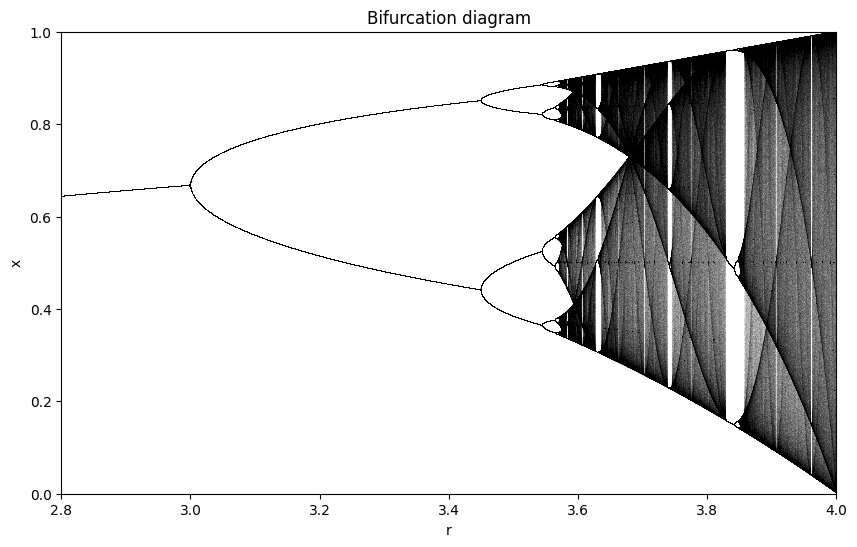

In [37]:
plot_bifurcation(2.8, 4.0, 20000, 2000, 1000)

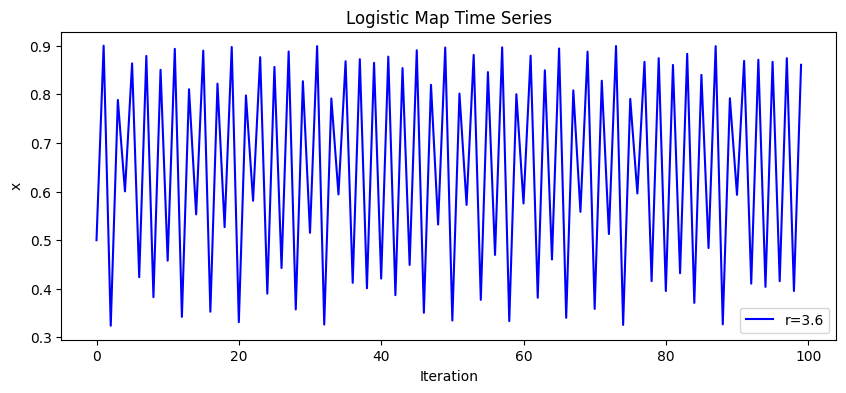

In [21]:
plot_time_series(3.6, 0.5, 100)  # Example of chaotic behavior

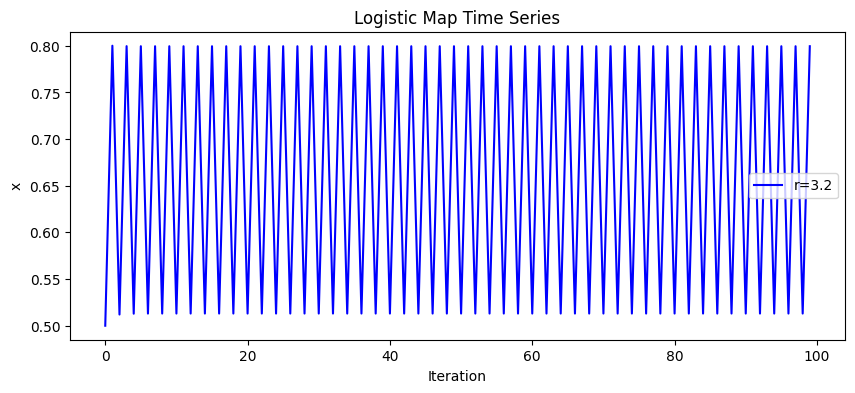

In [22]:
plot_time_series(3.2, 0.5, 100)  # Example before chaos

In [24]:
# Setup the interactive widget
interact(plot_time_series, 
         r=FloatSlider(min=2.5, max=4.0, step=0.01, value=3.5, description='Growth Rate r:'),
         initial_x=FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Initial x:'),
         num_iterations=(10, 1000))

interactive(children=(FloatSlider(value=3.5, description='Growth Rate r:', max=4.0, min=2.5, step=0.01), Float…

<function __main__.plot_time_series(r, initial_x, num_iterations)>

In [43]:
def plot_logistic_bifurcation_and_time_series(r=3.5, num_iterations=1000, last_iterations=100):
    """
    Plots the bifurcation diagram for the logistic map and a vertical line for a specific r value,
    along with the time series for that r.
    """
    # Bifurcation diagram
    r_values = np.linspace(2.5, 4.0, 10000)
    x_values = np.ones(r_values.shape) * 0.5
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
    
    for i in range(num_iterations):
        x_values = logistic_map(r_values, x_values)
        if i >= num_iterations - last_iterations:
            ax1.plot(r_values, x_values, ',k', alpha=0.25)
    
    # Add vertical line at the current r
    ax1.axvline(x=r, color='red', linestyle='--')
    ax1.set_title('Bifurcation Diagram')
    ax1.set_xlabel('r')
    ax1.set_ylabel('x')
    
    # Time series for the selected r
    x_time_series = np.zeros(num_iterations)
    x_time_series[0] = 0.5
    for i in range(1, num_iterations):
        x_time_series[i] = logistic_map(r, x_time_series[i-1])
    
    ax2.plot(x_time_series, '-b')
    ax2.set_title(f'Time Series at r = {r}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('x')
    
    plt.tight_layout()
    plt.show()

# Setup interactive widget
interactive_plot = interactive(plot_logistic_bifurcation_and_time_series,
                               r=FloatSlider(min=2.5, max=4.0, step=0.01, value=3.5, description='Growth Rate r:'))
display(interactive_plot)

interactive(children=(FloatSlider(value=3.5, description='Growth Rate r:', max=4.0, min=2.5, step=0.01), IntSl…